In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#transpose matrix to have sample as row, gene in column
her2_transpose = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\Normalized expression data set\her2_NT_logCPMrmBatch_20221128.csv", index_col=[0])
her2 = her2_transpose.transpose()
her2.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288605.1,ENSG00000288612.1,ENSG00000288658.1,ENSG00000288663.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-B6-A0IK-01A-12R-A056-07,3.897651,-1.586061,5.760253,4.648872,3.279993,2.140718,4.527706,5.679525,4.975373,5.748388,...,1.670914,-2.158763,-2.363547,-4.859477,-1.187683,-2.221493,-1.846360,2.524250,-3.272639,-0.419792
TCGA-BH-A18L-11A-42R-A12D-07,5.961559,5.051540,4.779184,3.951139,1.750402,3.790612,7.874544,5.445666,5.645934,4.841681,...,1.687118,-3.188050,-0.956204,-1.413993,-0.038869,-2.260158,-0.976749,2.522203,-1.951670,-1.773240
TCGA-E2-A1LE-01A-12R-A19W-07,5.527254,-0.507889,5.130748,5.930341,4.181295,3.471551,6.215413,5.389251,5.075556,5.826492,...,1.374041,-2.811079,-1.340778,-4.443323,0.040145,-3.149892,-1.735470,2.537467,-2.372744,-0.840193
TCGA-BH-A0HA-11A-31R-A12P-07,5.996528,1.884930,4.818182,4.620929,2.174971,2.453072,4.269149,4.245646,4.972524,5.196222,...,2.394243,-1.163184,0.060745,0.850131,-0.621014,-3.063207,-1.090077,2.452330,-2.619378,-1.298534
TCGA-D8-A1JG-01B-11R-A13Q-07,4.971004,-3.479182,5.279608,4.552798,3.512398,3.644038,6.084775,5.133298,4.002420,5.767138,...,1.288402,-3.942962,-3.379458,-5.070112,-0.592789,-0.529556,-1.774356,2.079409,-3.496122,1.565105


In [3]:
#PCA
pca = PCA(n_components=50)
principalComponents_her2 = pca.fit_transform(her2)
principal_her2_Df = pd.DataFrame(data = principalComponents_her2
             , columns = ["PC"+str(i) for i in range(1, 51)])


In [4]:
# Take pam50 column from metadata and set as index of PCA dataframe
unsorted_metadata = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\Normalized expression data set\metadata\selected_metadat_20221128.csv")
unsorted_metadata.head()
her2_metadata = unsorted_metadata.query('pam50 == "Her2" or pam50 == "Healthy"')
her2_metadata.head()
her2_pam50 = her2_metadata[('pam50')].to_list()
principal_her2_Df['pam50'] = her2_pam50
principal_her2_Df.set_index('pam50', drop = True, inplace = True)
principal_her2_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
pam50,,,,,,,,,,,,,,,,,,,,,
Her2,107.099579,-3.109887,33.592348,5.316316,-6.643467,-14.694770,22.134727,-4.199654,-9.815750,-27.242270,...,5.263479,-6.062831,4.646268,-13.342177,-19.792559,-4.741683,-2.780817,21.080660,9.490014,-2.620874
Healthy,-89.554756,17.872659,-9.240314,16.323497,7.924379,-22.618731,-3.808083,-9.227901,-0.113849,0.381353,...,0.839345,-2.234264,0.812773,-0.246807,-2.665988,0.026421,1.728222,-6.702617,5.722458,-1.172160
Her2,83.577746,39.987084,-3.067887,-42.689359,13.974911,4.071823,0.624631,-0.936173,6.764735,-13.587124,...,0.092512,8.426835,-4.579428,-0.684147,2.486863,-7.505255,4.671260,14.917646,7.241169,-4.692135
Healthy,-62.519358,-91.635819,34.064340,-28.158487,-10.505580,36.116866,21.898063,12.023458,20.945818,2.957174,...,1.418487,-0.984484,-8.982395,-6.598248,-0.704222,-13.128015,1.379565,2.069112,6.167275,8.309334
Her2,124.925029,-7.722088,-57.049576,-24.359424,47.892990,32.940992,-7.834238,-7.371939,47.820775,11.830429,...,-32.743545,2.602791,-6.449986,-5.743509,2.700373,-9.875899,-0.548242,-2.525768,34.067376,-1.386970


<Figure size 640x480 with 0 Axes>

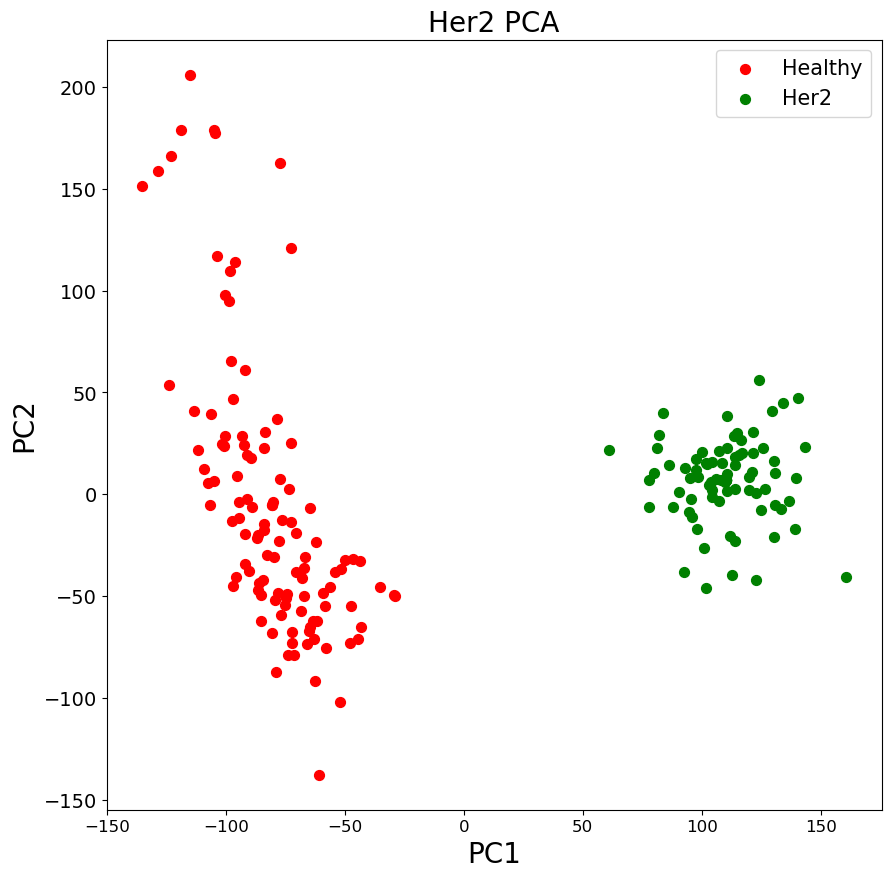

In [6]:
#formatting plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Her2 PCA",fontsize=20)
targets = ['Healthy', 'Her2']
colours = ['r', 'g']
#colour code points according to pam50
for target, colour in zip(targets,colours):
    index = principal_her2_Df.index == target
    plt.scatter(principal_her2_Df.loc[index, 'PC1']
               , principal_her2_Df.loc[index, 'PC2'], c = colour, s = 50)
#plot legend
plt.legend(targets,prop={'size': 15})



